## Load data

In [1]:
import sys
 
sys.path.insert(0, "../")

In [2]:
from dataAnalysis.DataAnalysis import DataAnalysis
import pandas as pd

data = pd.read_csv(r"../extdata/sbcdata.csv", header=0)
data_analysis = DataAnalysis(data)

/home/dwalke/git/sbc/statistics/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Training: 
Assessable data are 528101 cases and 1015074 CBCs
Control data are 527038 cases and 1013548 CBCs
Sepsis data are 1488 cases and 1526 CBCs
$$$$$$$$$$$$$$$$$$$$
Testing: 


/home/dwalke/git/sbc/statistics/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Controls: 365794, Sepsis: 490
Assessable data are 180494 cases and 366284 CBCs
Control data are 180157 cases and 365794 CBCs
Sepsis data are 472 cases and 490 CBCs


/home/dwalke/git/sbc/statistics/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Controls: 437629, Sepsis: 448
Assessable data are 157922 cases and 438077 CBCs
Control data are 180157 cases and 437629 CBCs
Sepsis data are 438 cases and 448 CBCs


## Normalize data

In [2]:
from dataAnalysis.FeatureImportance import normalize

X_test = data_analysis.get_X_test()
y_test = data_analysis.get_y_test()

X_train = normalize(data_analysis.get_X_train())
y_train = data_analysis.get_y_train()

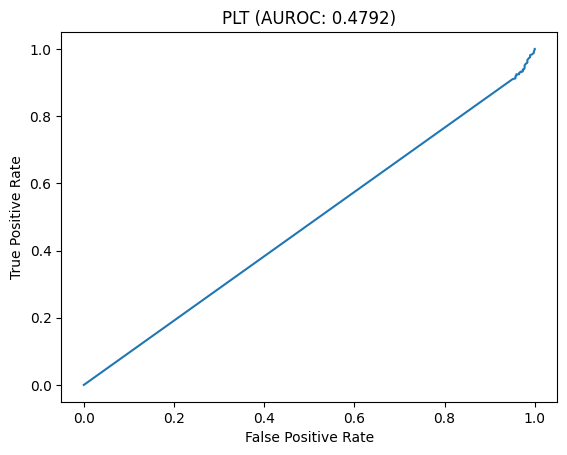

PLT
0.47923157017909207


/tmp/ipykernel_2601681/215380629.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Evaluation.plot_confusion_matrix_from_pred((y_score >= 0.5).astype(np.int), y_res) #np.round(y_score)


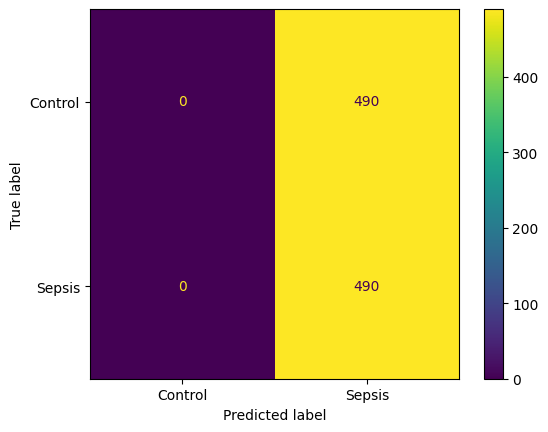

In [15]:
from sklearn import metrics
from dataAnalysis.Constants import FEATURES
import numpy as np
import torch
from dataAnalysis.Metrics import Evaluation
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler as RUS
rus = RUS(random_state=42)
X_res, y_res = rus.fit_resample(X_test, y_test)
## Confusion matrix # high auroc 
for i in range(X_res.shape[1]):
    if i != 6:
        continue
    y_score =1.0/(1.0 +np.exp(-X_res[:, i]))
    fpr, tpr, _ = metrics.roc_curve(y_res,  y_score)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(f"{FEATURES[i]} (AUROC: {str(np.round(metrics.roc_auc_score(y_res, y_score), 4))})")
    plt.show()
    
    
    softmax = torch.nn.Softmax(dim=0)
    y_score =1.0/(1.0 +np.exp(-X_res[:, i])) #softmax(torch.from_numpy(X_res[:, i])).numpy()
      #1.0/(1.0 +np.exp(-X_test[:, i]))
    Evaluation.plot_confusion_matrix_from_pred((y_score >= 0.5).astype(np.int), y_res) #np.round(y_score)
    print(FEATURES[i])
    print(metrics.roc_auc_score(y_res, y_score))
    #

## Filter samples by label

In [2]:
import numpy as np
# from sklearn.preprocessing import normalize
from dataAnalysis.FeatureImportance import normalize


X = data_analysis.get_X_train() #normalize(data_analysis.get_X_train())
control_indices = np.where(data_analysis.get_y_train() == 0)
sepsis_indices = np.where(data_analysis.get_y_train() == 1)
X_control = X[control_indices]
X_sepsis = X[sepsis_indices]

## Test normal distribution

In [19]:
from scipy.stats import shapiro
from dataAnalysis.Constants import FEATURES
import matplotlib.pyplot as plt

ALPHA = 0.05

def are_features_normal_distributed(X):
    normal_distr = {}
    for i in range(X.shape[1]):
        print(shapiro(X[:, i]))
        unique, counts = np.unique(X[:, i], return_counts=True)
        plt.plot(unique, counts)
        plt.ylabel("Counts")
        plt.xlabel(FEATURES[i])
        plt.show()
        normal_distr[FEATURES[i]] = shapiro(X[:, i])[1] > ALPHA
    return normal_distr

ShapiroResult(statistic=0.9733757376670837, pvalue=0.0)


/home/dwalke/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


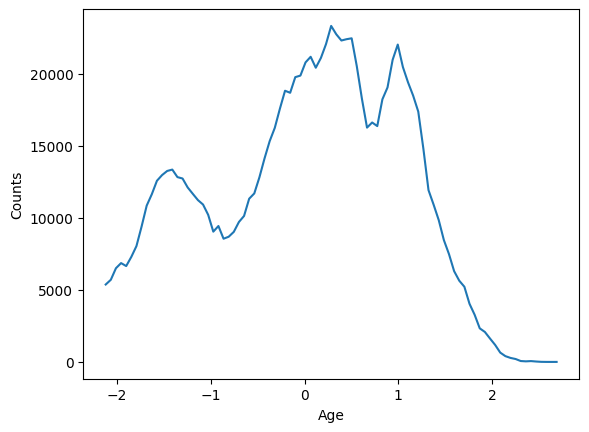

ShapiroResult(statistic=0.6342940330505371, pvalue=0.0)


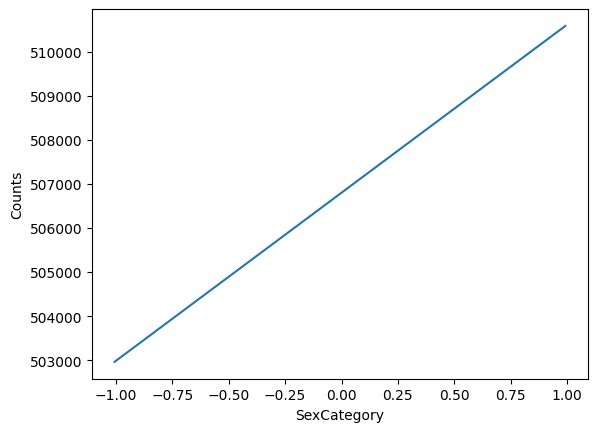

ShapiroResult(statistic=0.9784339666366577, pvalue=0.0)


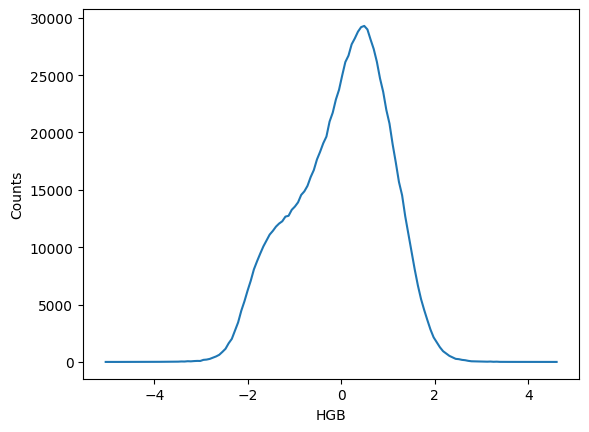

ShapiroResult(statistic=0.444458544254303, pvalue=0.0)


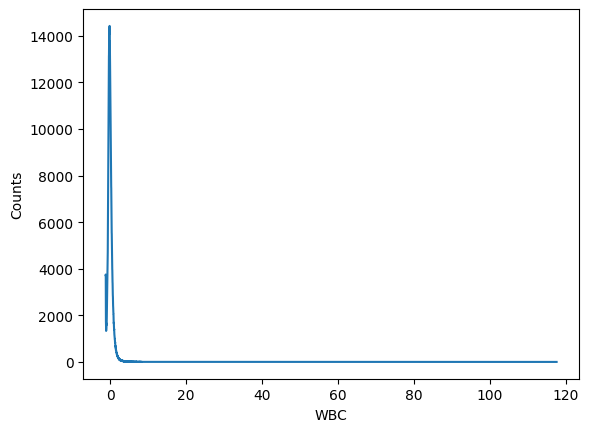

ShapiroResult(statistic=0.9863821268081665, pvalue=0.0)


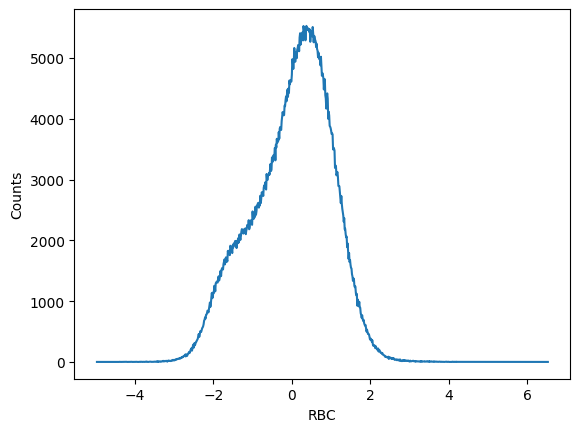

ShapiroResult(statistic=0.9775160551071167, pvalue=0.0)


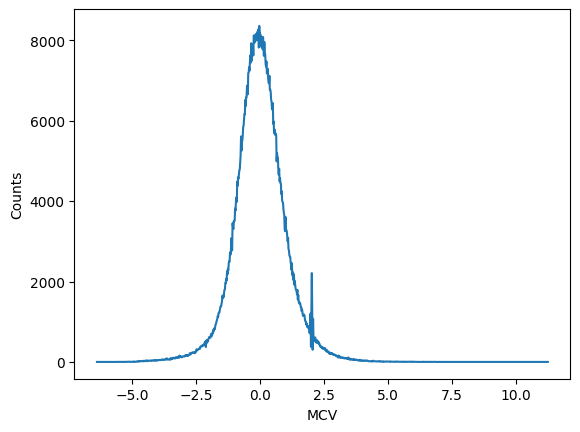

ShapiroResult(statistic=0.93293297290802, pvalue=0.0)


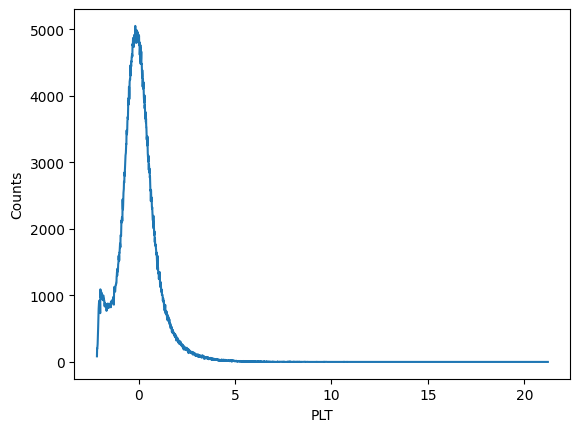

{'Age': False,
 'SexCategory': False,
 'HGB': False,
 'WBC': False,
 'RBC': False,
 'MCV': False,
 'PLT': False}

In [20]:
are_features_normal_distributed(X_control)

ShapiroResult(statistic=0.9586552381515503, pvalue=2.1217542987916018e-20)


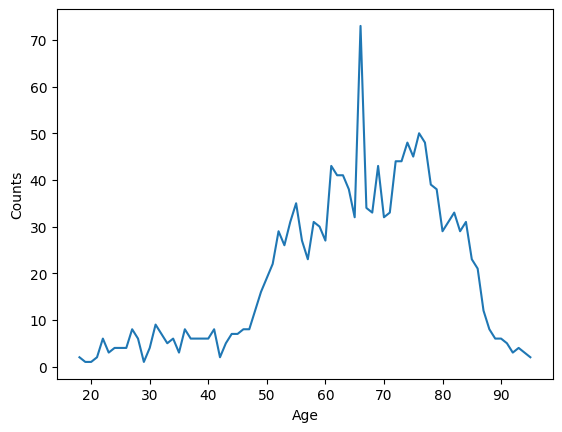

ShapiroResult(statistic=0.612926721572876, pvalue=0.0)


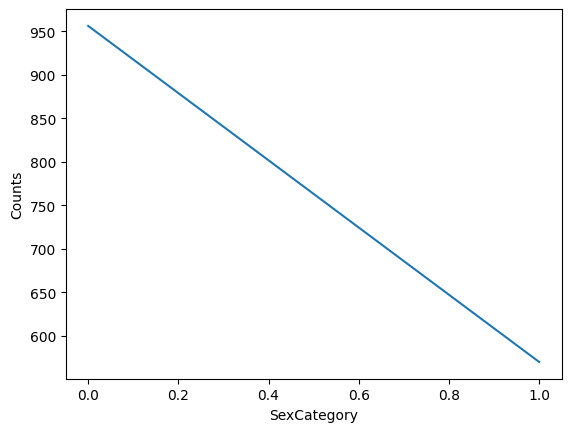

ShapiroResult(statistic=0.9972383975982666, pvalue=0.008960545063018799)


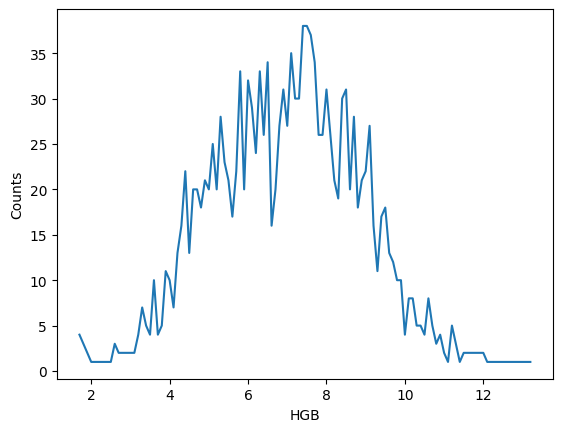

ShapiroResult(statistic=0.29287219047546387, pvalue=0.0)


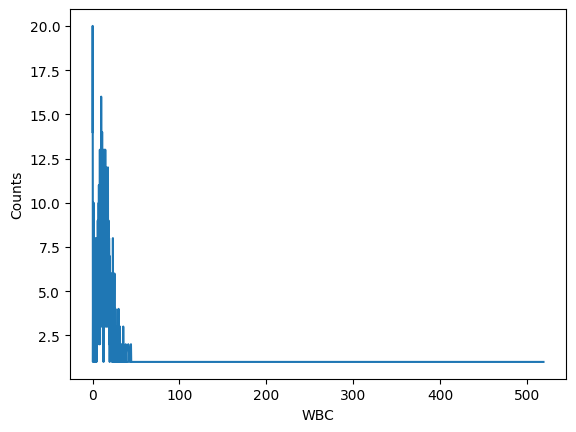

ShapiroResult(statistic=0.9973074793815613, pvalue=0.010625345632433891)


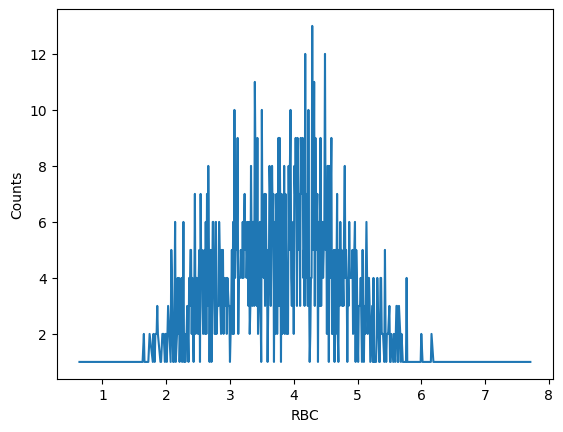

ShapiroResult(statistic=0.9667587280273438, pvalue=3.0050572095135344e-18)


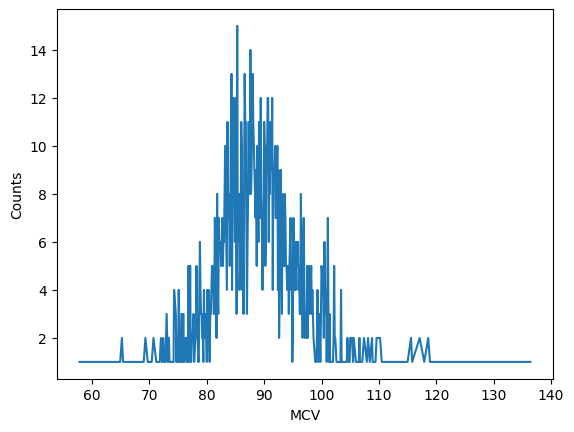

ShapiroResult(statistic=0.9290289878845215, pvalue=2.7562057389835597e-26)


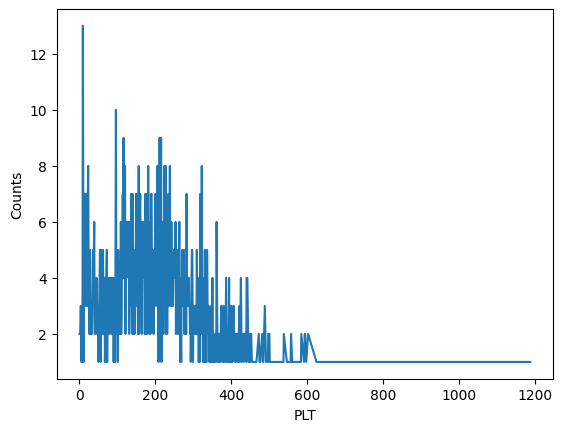

{'Age': False,
 'SexCategory': False,
 'HGB': False,
 'WBC': False,
 'RBC': False,
 'MCV': False,
 'PLT': False}

In [5]:
are_features_normal_distributed(X_sepsis)

## U- Test

In [3]:
from scipy.stats import mannwhitneyu,ttest_ind
from dataAnalysis.Constants import SEX_CATEGORY_COLUMN_NAME, FEATURES

ALPHA = .05
## ATENTION: Sex is not ordinal scaled so U test is not applicable
def are_features_different(X_control, X_sepsis):
    features_diff = {}
    for i in range(X_control.shape[1]):
        if FEATURES[i] == SEX_CATEGORY_COLUMN_NAME:
            continue
        U1, p = mannwhitneyu(X_control[:, i], X_sepsis[:, i], method="auto")
        print(FEATURES[i])
        print(p)
        features_diff[FEATURES[i]] = p <= ALPHA
    return features_diff

In [4]:
are_features_different(X_control, X_sepsis)

Age
1.7017558392331006e-78
HGB
2.97843193494062e-42
WBC
2.119712428675055e-202
RBC
1.3626693388526188e-39
MCV
4.4079806885301193e-10
PLT
1.4094737801198145e-39


{'Age': True, 'HGB': True, 'WBC': True, 'RBC': True, 'MCV': True, 'PLT': True}